In [25]:
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dfply import *
from plotnine import *
import seaborn as sns
import missingno

#### Stopwords from nltk
from nltk.corpus import stopwords
nltk_sw = stopwords.words("english")

#### Stopwrods from spacy
from spacy.lang.en.stop_words import STOP_WORDS as spacy_sw


import textblob



In [4]:
speeches = pd.read_csv("un_gen_debates_text.csv", encoding = "utf-8")
print(speeches.shape)
print(speeches.columns)

(7507, 7)
Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text'],
      dtype='object')


7507 rows, 7 different columns.

In [5]:
speeches.head()

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."


<AxesSubplot:>

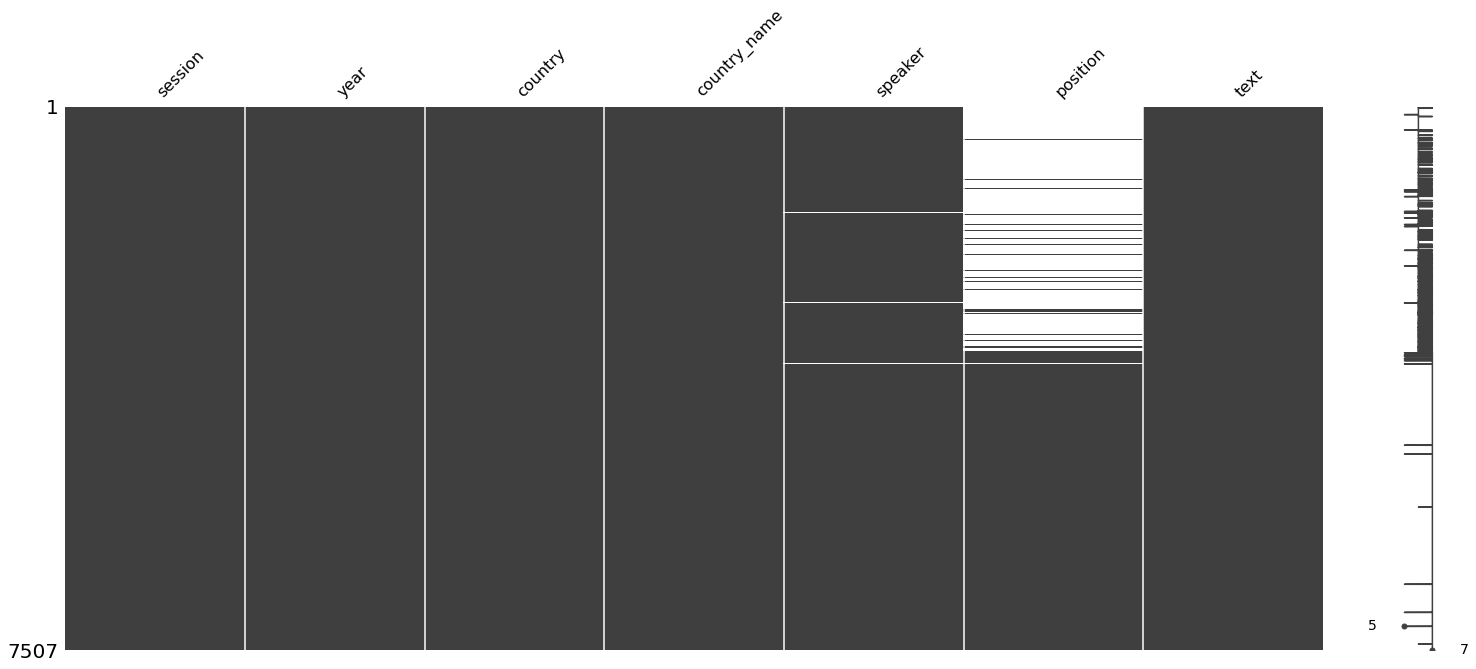

In [21]:
missingno.matrix(speeches)

In [24]:
speeches.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
dtype: int64

Wow. There are quite a bit of NAs in the `position` column. I wonder why. 

And a little bit in the `speaker` column.

In [9]:
speeches.text[0]

"33: May I first convey to our President the congratulations of the Albanian delegation on his election to the Presidency of the twenty-fifth session of the General Assembly?\n34.\tIn taking up the work on the agenda of the twenty- fifth session of the General Assembly, which is being held on the eve of the twenty-fifth anniversary of the coming into force of the Charter of the United Nations, the peace-loving Member States would have wished to be in a position to present on this occasion some picture of positive and satisfactory activity on the part of the United Nations. The Albanian delegation, for its part, would have taken great pleasure in drawing up such a balance sheet of activities covering a quarter of a century, which is certainly no short period in the life of an international organization. Unfortunately, this is not the situation. Created on the day after victory had been achieved over the Powers of the Rome BerlinTokyo Axis and conceived in the spirit of the principles wh

My God these humans talked a FREAKTON! 

I'd rather eat horse scat off a rotting cow than read this mess.

In [40]:
# Creating an nlp object
nlp = spacy.load("en_core_web_sm")
doc = nlp(speeches.text[0])

In [19]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

33 33 NUM CD ROOT dd False False
: : PUNCT : punct : False False
May may AUX MD aux Xxx True True
I I PRON PRP nsubj X True True
first first ADV RB advmod xxxx True True
convey convey VERB VB ROOT xxxx True False
to to ADP IN prep xx True True
our our PRON PRP$ poss xxx True True
President President PROPN NNP pobj Xxxxx True False
the the DET DT det xxx True True
congratulations congratulation NOUN NNS dobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
Albanian albanian ADJ JJ amod Xxxxx True False
delegation delegation NOUN NN pobj xxxx True False
on on ADP IN prep xx True True
his his PRON PRP$ poss xxx True True
election election NOUN NN pobj xxxx True False
to to ADP IN prep xx True True
the the DET DT det xxx True True
Presidency Presidency PROPN NNP pobj Xxxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
twenty twenty NUM CD nummod xxxx True True
- - PUNCT HYPH punct - False False
fifth fifth ADJ JJ amod xxxx True Fa

the the DET DT det xxx True True
United United PROPN NNP compound Xxxxx True False
Nations Nations PROPN NNP pobj Xxxxx True False
to to PART TO aux xx True True
serve serve VERB VB acl xxxx True False
this this DET DT det xxxx True True
policy policy NOUN NN dobj xxxx True False
has have AUX VBZ aux xxx True True
resulted result VERB VBN ccomp xxxx True False
in in ADP IN prep xx True True
the the DET DT det xxx True True
Organization Organization PROPN NNP pobj Xxxxx True False
not not PART RB preconj xxx True True
only only ADV RB advmod xxxx True True
not not PART RB neg xxx True True
having having AUX VBG aux xxxx True False
been be VERB VBN advcl xxxx True True
able able ADJ JJ acomp xxxx True False
to to PART TO aux xx True True
stay stay VERB VB xcomp xxxx True False
the the DET DT det xxx True True
hand hand NOUN NN dobj xxxx True False
of of ADP IN prep xx True True
those those DET DT pobj xxxx True True
committing commit VERB VBG acl xxxx True False
aggression aggression NOU

the the DET DT det xxx True True
United United PROPN NNP compound Xxxxx True False
Nations Nations PROPN NNP nsubjpass Xxxxx True False
is be AUX VBZ auxpass xx True True
concerned concern VERB VBN advcl xxxx True False
, , PUNCT , punct , False False
it it PRON PRP nsubj xx True True
has have AUX VBZ aux xxx True True
become become VERB VBN ccomp xxxx True True
a a DET DT det x True True
center center NOUN NN attr xxxx True False
of of ADP IN prep xx True True
bargaining bargaining NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
maneuvering maneuvering NOUN NN conj xxxx True False
and and CCONJ CC cc xxx True True
underhand underhand ADJ JJ conj xxxx True False
manipulations manipulation NOUN NNS conj xxxx True False
on on ADP IN prep xx True True
the the DET DT det xxx True True
part part NOUN NN pobj xxxx True True
of of ADP IN prep xx True True
the the DET DT det xxx True True
American american ADJ JJ amod Xxxxx True False
imperialists imperialist NOUN NNS pobj xxxx Tr

brought bring VERB VBN relcl xxxx True False
about about ADP RP prt xxxx True True
an an DET DT det xx True True
abnormal abnormal ADJ JJ amod xxxx True False
situation situation NOUN NN dobj xxxx True False
without without ADP IN prep xxxx True True
precedent precedent NOUN NN pobj xxxx True False
in in ADP IN prep xx True True
this this DET DT det xxxx True True
Organization Organization PROPN NNP pobj Xxxxx True False
and and CCONJ CC cc xxx True True
constituted constitute VERB VBD conj xxxx True False
a a DET DT det x True True
severe severe ADJ JJ amod xxxx True False
blow blow NOUN NN dobj xxxx True False
to to ADP IN prep xx True True
its its PRON PRP$ poss xxx True True
prestige prestige NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
but but CCONJ CC cc xxx True True
also also ADV RB advmod xxxx True True
has have AUX VBZ aux xxx True True
at at ADP IN prep xx True True
the the DET DT det xxx True True
same same ADJ JJ amod xxxx True True
time time NOUN NN pobj x

Kremlin Kremlin PROPN NNP pobj Xxxxx True False
, , PUNCT , punct , False False
the the DET DT det xxx True True
struggle struggle NOUN NN dobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
African african ADJ JJ amod Xxxxx True False
peoples people NOUN NNS pobj xxxx True False
of of ADP IN prep xx True True
Mozambique Mozambique PROPN NNP pobj Xxxxx True False
, , PUNCT , punct , False False
Angola Angola PROPN NNP conj Xxxxx True False
, , PUNCT , punct , False False
Guinea Guinea PROPN NNP conj Xxxxx True False
( ( PUNCT -LRB- punct ( False False
Bissau Bissau PROPN NNP appos Xxxxx True False
) ) PUNCT -RRB- punct ) False False
, , PUNCT , punct , False False
Namibia Namibia PROPN NNP conj Xxxxx True False
, , PUNCT , punct , False False
Southern Southern PROPN NNP compound Xxxxx True False
Rhodesia Rhodesia PROPN NNP conj Xxxxx True False
and and CCONJ CC cc xxx True True
South South PROPN NNP compound Xxxxx True False
Africa Africa PROPN NNP conj

their their PRON PRP$ poss xxxx True True
aggressive aggressive ADJ JJ amod xxxx True False
activities activity NOUN NNS conj xxxx True False
, , PUNCT , punct , False False
their their PRON PRP$ poss xxxx True True
plans plan NOUN NNS dep xxxx True False
and and CCONJ CC cc xxx True True
their their PRON PRP$ poss xxxx True True
plots plot NOUN NNS conj xxxx True False
, , PUNCT , punct , False False
which which DET WDT nsubj xxxx True True
extend extend VERB VBP relcl xxxx True False
to to ADP IN prep xx True True
all all DET DT det xxx True True
continents continent NOUN NNS pobj xxxx True False
in in ADP IN prep xx True True
conformity conformity NOUN NN pobj xxxx True False
with with ADP IN prep xxxx True True
their their PRON PRP$ poss xxxx True True
global global ADJ JJ amod xxxx True False
counterrevolutionary counterrevolutionary ADJ JJ amod xxxx True False
strategy strategy NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
which which DET WDT nsubjpass xxxx True Tr

Powers Powers PROPN NNPS pobj Xxxxx True False
through through ADP IN prep xxxx True True
diplomatic diplomatic ADJ JJ amod xxxx True False
channels channel NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
the the DET DT det xxx True True
long long ADJ JJ amod xxxx True False
meetings meeting NOUN NNS dobj xxxx True False
of of ADP IN prep xx True True
their their PRON PRP$ poss xxxx True True
representatives representative NOUN NNS pobj xxxx True False
in in ADP IN prep xx True True
Helsinki Helsinki PROPN NNP pobj Xxxxx True False
and and CCONJ CC cc xxx True True
later later ADV RB advmod xxxx True False
in in ADP IN prep xx True True
Vienna Vienna PROPN NNP pobj Xxxxx True False
, , PUNCT , punct , False False
meetings meeting NOUN NNS appos xxxx True False
which which DET WDT nsubjpass xxxx True True
certainly certainly ADV RB advmod xxxx True False
are be AUX VBP auxpass xxx True True
not not PART RB neg xxx True True
limited limit VERB VBN relcl xxxx True False
to t

in in ADP IN prep xx True True
Europe Europe PROPN NNP pobj Xxxxx True False
and and CCONJ CC cc xxx True True
their their PRON PRP$ poss xxxx True True
rearguard rearguard NOUN NN compound xxxx True False
activities activity NOUN NNS conj xxxx True False
on on ADP IN prep xx True True
that that DET DT det xxxx True True
continent continent NOUN NN pobj xxxx True False
in in ADP IN prep xx True True
order order NOUN NN pobj xxxx True False
to to PART TO aux xx True True
implement implement VERB VB acl xxxx True False
their their PRON PRP$ poss xxxx True True
counterrevolutionary counterrevolutionary ADJ JJ amod xxxx True False
plans plan NOUN NNS dobj xxxx True False
in in ADP IN prep xx True True
Asia Asia PROPN NNP pobj Xxxx True False
, , PUNCT , punct , False False
Africa Africa PROPN NNP appos Xxxxx True False
and and CCONJ CC cc xxx True True
elsewhere elsewhere ADV RB conj xxxx True True
. . PUNCT . punct . False False

 
 SPACE _SP ROOT 
 False False
44 44 NUM CD nummod dd Fals

of of ADP IN prep xx True True
peoples people NOUN NNS pobj xxxx True False
and and CCONJ CC cc xxx True True
of of ADP IN conj xx True True
small small ADJ JJ amod xxxx True False
countries country NOUN NNS pobj xxxx True False
was be AUX VBD auxpass xxx True True
decided decide VERB VBN relcl xxxx True False
by by ADP IN agent xx True True
the the DET DT det xxx True True
great great ADJ JJ amod xxxx True False
imperialist imperialist NOUN NN amod xxxx True False
Powers Powers PROPN NNPS pobj Xxxxx True False
has have AUX VBZ aux xxx True True
gone go VERB VBN ROOT xxxx True False
for for ADP IN prep xxx True True
ever ever ADV RB pcomp xxxx True True
. . PUNCT . punct . False False
The the DET DT advmod Xxx True True
more more ADV RBR advmod xxxx True True
the the DET DT det xxx True True
imperialists imperialist NOUN NNS nsubj xxxx True False
intensify intensify VERB VBP advcl xxxx True False
their their PRON PRP$ poss xxxx True True
aggressive aggressive ADJ JJ amod xxxx True Fals

opposition opposition NOUN NN dobj xxxx True False
on on ADP IN prep xx True True
the the DET DT det xxx True True
part part NOUN NN pobj xxxx True True
of of ADP IN prep xx True True
peoples people NOUN NNS pobj xxxx True False
throughout throughout ADP IN prep xxxx True True
the the DET DT det xxx True True
world world NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
including include VERB VBG prep xxxx True False
the the DET DT det xxx True True
American american ADJ JJ amod Xxxxx True False
people people NOUN NNS pobj xxxx True False
. . PUNCT . punct . False False
Instead instead ADV RB advmod Xxxxx True False
of of ADP IN prep xx True True
stifling stifle VERB VBG pcomp xxxx True False
the the DET DT det xxx True True
liberation liberation NOUN NN compound xxxx True False
struggle struggle NOUN NN dobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
VietNamese vietnamese ADJ JJ amod XxxxXxxxx True False
people people NOUN NNS pobj xxxx 

in in ADP IN prep xx True True
Saigon Saigon PROPN NNP pobj Xxxxx True False
and and CCONJ CC cc xxx True True
Seoul Seoul PROPN NNP conj Xxxxx True False
and and CCONJ CC cc xxx True True
even even ADV RB advmod xxxx True True
by by ADP IN conj xx True True
the the DET DT det xxx True True
riffraff riffraff NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
Chiang Chiang PROPN NNP compound Xxxxx True False
Kaishek Kaishek PROPN NNP pobj Xxxxx True False
, , PUNCT , punct , False False
as as ADV RB advmod xx True True
well well ADV RB advmod xxxx True True
as as ADP IN cc xx True True
by by ADP IN prep xx True True
international international ADJ JJ amod xxxx True False
reaction reaction NOUN NN pobj xxxx True False
as as ADP IN prep xx True True
a a DET DT det x True True
whole whole NOUN NN pobj xxxx True True
, , PUNCT , punct , False False
have have AUX VBP aux xxxx True True
once once ADV RB advmod xxxx True True
again again ADV RB advmod xxxx True True
revealed reveal VE

made make VERB VBN conj xxxx True True
it it PRON PRP nsubj xx True True
invincible invincible ADJ JJ ccomp xxxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
by by ADP IN conj xx True True
its its PRON PRP$ poss xxx True True
determined determined ADJ JJ amod xxxx True False
and and CCONJ CC cc xxx True True
heroic heroic ADJ JJ conj xxxx True False
struggle struggle NOUN NN pobj xxxx True False
it it PRON PRP nsubj xx True True
will will AUX MD aux xxxx True True
undoubtedly undoubtedly ADV RB advmod xxxx True False
deal deal VERB VB conj xxxx True False
ever ever ADV RB advmod xxxx True True
more more ADV RBR advmod xxxx True True
crushing crush VERB VBG amod xxxx True False
blows blow NOUN NNS dobj xxxx True False
at at ADP IN prep xx True True
American american ADJ JJ amod Xxxxx True False
imperialism imperialism NOUN NN pobj xxxx True False
until until ADP IN mark xxxx True True
it it PRON PRP nsubjpass xx True True
is be AUX VBZ auxpass xx True Tru

, , PUNCT , punct , False False
Laird Laird PROPN NNP conj Xxxxx True False
and and CCONJ CC cc xxx True True
other other ADJ JJ amod xxxx True True
leaders leader NOUN NNS conj xxxx True False
, , PUNCT , punct , False False
threatens threaten VERB VBZ ROOT xxxx True False
to to PART TO aux xx True True
intervene intervene VERB VB xcomp xxxx True False
in in ADP IN prep xx True True
the the DET DT det xxx True True
internal internal ADJ JJ amod xxxx True False
affairs affair NOUN NNS pobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
Arab arab ADJ JJ amod Xxxx True False
countries country NOUN NNS pobj xxxx True False
and and CCONJ CC cc xxx True True
also also ADV RB advmod xxxx True True
threatens threaten VERB VBZ conj xxxx True False
intervention intervention NOUN NN dobj xxxx True False
by by ADP IN prep xx True True
its its PRON PRP$ poss xxx True True
Sixth Sixth PROPN NNP compound Xxxxx True False
Fleet Fleet PROPN NNP pobj Xxxxx True False
, 

know know VERB VBP ROOT xxxx True False
full full ADV RB advmod xxxx True True
well well ADV RB advmod xxxx True True
that that SCONJ IN mark xxxx True True
the the DET DT det xxx True True
American american ADJ JJ amod Xxxxx True False
plan plan NOUN NN nsubjpass xxxx True False
which which DET WDT nsubjpass xxxx True True
is be AUX VBZ auxpass xx True True
based base VERB VBN relcl xxxx True False
on on ADP IN prep xx True True
the the DET DT det xxx True True
Security Security PROPN NNP compound Xxxxx True False
Council Council PROPN NNP compound Xxxxx True False
resolution resolution NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
22 22 NUM CD nummod dd False False
November November PROPN NNP pobj Xxxxx True False
1967 1967 NUM CD nummod dddd False False
[ [ PUNCT -LRB- punct [ False False
242 242 NUM CD nummod ddd False False
( ( PUNCT -LRB- punct ( False False
1967 1967 NUM CD npadvmod dddd False False
) ) PUNCT -RRB- punct ) False False
] ] PUNCT -RRB- punct ] False 

criminal criminal ADJ JJ amod xxxx True False
plan plan NOUN NN pobj xxxx True False
and and CCONJ CC cc xxx True True
the the DET DT det xxx True True
other other ADJ JJ amod xxxx True True
giving give VERB VBG conj xxxx True False
that that DET DT nsubj xxxx True True
plan plan VERB VBP ccomp xxxx True False
its its PRON PRP$ poss xxx True True
support support NOUN NN dobj xxxx True False
. . PUNCT . punct . False False

 
 SPACE _SP ROOT 
 False False
59 59 NUM CD nummod dd False False
. . PUNCT . punct . False False
	 	 SPACE _SP ROOT 	 False False
The the DET DT det Xxx True True
Arab arab ADJ JJ amod Xxxx True False
peoples people NOUN NNS nsubj xxxx True False
know know VERB VBP ROOT xxxx True False
full full ADV RB advmod xxxx True True
well well ADV RB advmod xxxx True True
that that SCONJ IN mark xxxx True True
any any DET DT det xxx True True
proposal proposal NOUN NN nsubjpass xxxx True False
by by ADP IN prep xx True True
the the DET DT det xxx True True
United United PROP

roots root NOUN NNS dobj xxxx True False
deep deep ADV RB advmod xxxx True False
in in ADP IN prep xx True True
the the DET DT det xxx True True
Near Near PROPN NNP compound Xxxx True False
East East PROPN NNP pobj Xxxx True False
and and CCONJ CC cc xxx True True
in in ADP IN conj xx True True
ensuring ensure VERB VBG pcomp xxxx True False
that that SCONJ IN mark xxxx True True
they they PRON PRP nsubj xxxx True True
have have VERB VBP ccomp xxxx True True
economic economic ADJ JJ amod xxxx True False
, , PUNCT , punct , False False
political political ADJ JJ conj xxxx True False
and and CCONJ CC cc xxx True True
military military ADJ JJ conj xxxx True False
bases basis NOUN NNS dobj xxxx True False
in in ADP IN prep xx True True
the the DET DT det xxx True True
countries country NOUN NNS pobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
area area NOUN NN pobj xxxx True False
; ; PUNCT : punct ; False False
they they PRON PRP nsubj xxxx True True
wan

trap trap NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
that that DET DT det xxxx True True
plan plan NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
The the DET DT det Xxx True True
SovietUnited SovietUnited PROPN NNP compound XxxxxXxxxx True False
States States PROPN NNP compound Xxxxx True False
armies army NOUN NNS nsubj xxxx True False
can can AUX MD aux xxx True True
, , PUNCT , punct , False False
by by ADP IN prep xx True True
recourse recourse NOUN NN pobj xxxx True False
to to ADP IN prep xx True True
various various ADJ JJ amod xxxx True True
insidious insidious ADJ JJ amod xxxx True False
means mean NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
succeed succeed VERB VB ROOT xxxx True False
in in ADP IN prep xx True True
establishing establish VERB VBG pcomp xxxx True False
themselves themselves PRON PRP dobj xxxx True True
on on ADP IN prep xx True True
both both DET DT det xxxx True True
sides side NOUN NNS pobj xxxx True False
of 

Comrade Comrade PROPN NNP compound Xxxxx True False
Enver Enver PROPN NNP compound Xxxxx True False
Hoxha Hoxha PROPN NNP nsubj Xxxxx True False
, , PUNCT , punct , False False
indicated indicate VERB VBD advcl xxxx True False
in in ADP IN prep xx True True
his his PRON PRP$ poss xxx True True
statement statement NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
18 18 NUM CD nummod dd False False
September September PROPN NNP pobj Xxxxx True False
, , PUNCT , punct , False False
Soviet soviet ADJ JJ amod Xxxxx True False
social social ADJ JJ amod xxxx True False
- - PUNCT HYPH punct - False False
imperialism imperialism NOUN NN nsubj xxxx True False
is be AUX VBZ aux xx True True
pursuing pursue VERB VBG ccomp xxxx True False
aims aim NOUN NNS dobj xxxx True False
that that DET WDT nsubj xxxx True True
have have VERB VBP relcl xxxx True True
nothing nothing PRON NN dobj xxxx True True
in in ADP IN prep xx True True
common common ADJ JJ amod xxxx True False
with with ADP IN pr

and and CCONJ CC cc xxx True True
the the DET DT det xxx True True
Soviet Soviet PROPN NNP compound Xxxxx True False
Union Union PROPN NNP conj Xxxxx True False
, , PUNCT , punct , False False
an an DET DT det xx True True
important important ADJ JJ amod xxxx True False
place place NOUN NN nsubjpass xxxx True False
is be AUX VBZ auxpass xx True True
held hold VERB VBN ROOT xxxx True False
also also ADV RB advmod xxxx True True
by by ADP IN agent xx True True
the the DET DT det xxx True True
so so ADV RB advmod xx True True
- - PUNCT HYPH punct - False False
called call VERB VBN amod xxxx True False
question question NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
European european ADJ JJ amod Xxxxx True False
security security NOUN NN compound xxxx True False
conference conference NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
proposed propose VERB VBN acl xxxx True False
last last ADJ JJ amod xxxx True True
year year NOUN NN n

give give VERB VB xcomp xxxx True True
them they PRON PRP dative xxxx True True
something something PRON NN dobj xxxx True True
to to PART TO aux xx True True
cling cling VERB VB relcl xxxx True False
to to ADP IN prep xx True True
as as ADP IN mark xx True True
they they PRON PRP nsubj xxxx True True
conclude conclude VERB VBP advcl xxxx True False
these these DET DT det xxxx True True
agreements agreement NOUN NNS dobj xxxx True False
. . PUNCT . punct . False False
It it PRON PRP nsubj Xx True True
was be AUX VBD ROOT xxx True True
on on ADP IN prep xx True True
the the DET DT det xxx True True
basis basis NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
that that DET DT det xxxx True True
formula formula NOUN NN pobj xxxx True False
that that DET WDT pobj xxxx True True
the the DET DT det xxx True True
negotiations negotiation NOUN NNS nsubj xxxx True False
took take VERB VBD relcl xxxx True False
place place NOUN NN dobj xxxx True False
between between ADP IN prep xxxx 

SovietGerman SovietGerman PROPN NNP compound XxxxxXxxxx True False
Treaty Treaty PROPN NNP pobj Xxxxx True False
, , PUNCT , punct , False False
apart apart ADV RB advmod xxxx True False
from from ADP IN prep xxxx True True
a a DET DT quantmod x True True
few few ADJ JJ nummod xxx True True
equivocal equivocal ADJ JJ amod xxxx True False
and and CCONJ CC cc xxx True True
questionable questionable ADJ JJ conj xxxx True False
terms term NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
there there PRON EX expl xxxx True True
is be AUX VBZ ROOT xx True True
no no DET DT det xx True True
reference reference NOUN NN attr xxxx True False
to to ADP IN prep xx True True
recognition recognition NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
borders border NOUN NNS pobj xxxx True False
between between ADP IN prep xxxx True True
the the DET DT det xxx True True
two two NUM CD nummod xxx True True
German german ADJ JJ amod Xxxxx True False
States States PROPN NNP pobj Xxxx

of of ADP IN prep xx True True
the the DET DT det xxx True True
German german ADJ JJ amod Xxxxx True False
revenge revenge NOUN NN compound xxxx True False
- - PUNCT HYPH punct - False False
seekers seeker NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
for for ADP IN prep xxx True True
the the DET DT det xxx True True
memory memory NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
Hitler Hitler PROPN NNP poss Xxxxx True False
's 's PART POS case 'x False True
nonaggression nonaggression NOUN NN compound xxxx True False
pacts pact NOUN NNS pobj xxxx True False
with with ADP IN prep xxxx True True
European European PROPN NNP compound Xxxxx True False
States States PROPN NNP pobj Xxxxx True False
is be AUX VBZ ccomp xx True True
still still ADV RB advmod xxxx True True
very very ADV RB advmod xxxx True True
fresh fresh ADJ JJ acomp xxxx True False
in in ADP IN prep xx True True
their their PRON PRP$ poss xxxx True True
minds mind NOUN NNS pobj xxxx True False
. . 

but but CCONJ CC cc xxx True True
also also ADV RB advmod xxxx True True
to to ADP IN conj xx True True
other other ADJ JJ amod xxxx True True
areas area NOUN NNS pobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
world world NOUN NN pobj xxxx True False
which which DET WDT nsubj xxxx True True
are be VERB VBP relcl xxx True True
the the DET DT det xxx True True
object object NOUN NN attr xxxx True False
of of ADP IN prep xx True True
United United PROPN NNP compound Xxxxx True False
StatesSoviet StatesSoviet PROPN NNP compound XxxxxXxxxx True False
plans plan NOUN NNS pobj xxxx True False
of of ADP IN prep xx True True
aggression aggression NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
Thus thus ADV RB advmod Xxxx True True
the the DET DT det xxx True True
leaders leader NOUN NNS nsubj xxxx True False
in in ADP IN prep xx True True
Moscow Moscow PROPN NNP pobj Xxxxx True False
have have AUX VBP aux xxxx True True
joined join VERB VBN RO

foreign foreign ADJ JJ amod xxxx True False
policy policy NOUN NN dobj xxxx True False
. . PUNCT . punct . False False
But but CCONJ CC cc Xxx True True
, , PUNCT , punct , False False
as as ADP IN mark xx True True
all all DET PDT predet xxx True True
these these DET DT det xxxx True True
States state NOUN NNS nsubj Xxxxx True False
know know VERB VBP advcl xxxx True False
full full ADV RB advmod xxxx True True
well well ADV RB advmod xxxx True True
, , PUNCT , punct , False False
such such ADJ JJ amod xxxx True True
noble noble ADJ JJ amod xxxx True False
objectives objective NOUN NNS nsubj xxxx True False
have have VERB VBP ROOT xxxx True True
nothing nothing PRON NN dobj xxxx True True
in in ADP IN prep xx True True
common common ADJ JJ amod xxxx True False
with with ADP IN prep xxxx True True
the the DET DT det xxx True True
criminal criminal ADJ JJ amod xxxx True False
plans plan NOUN NNS pobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
United 

- - PUNCT HYPH punct - False False
seeking seek VERB VBG amod xxxx True False
Germany Germany PROPN NNP pobj Xxxxx True False
, , PUNCT , punct , False False
their their PRON PRP$ poss xxxx True True
plans plan NOUN NNS appos xxxx True False
for for ADP IN prep xxx True True
Asia Asia PROPN NNP pobj Xxxx True False
aimed aim VERB VBN acl xxxx True False
particularly particularly ADV RB advmod xxxx True False
at at ADP IN prep xx True True
the the DET DT det xxx True True
encirclement encirclement NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
People People PROPN NNPS poss Xxxxx True False
's 's PART POS case 'x False True
Republic Republic PROPN NNP pobj Xxxxx True False
of of ADP IN prep xx True True
China China PROPN NNP pobj Xxxxx True False
and and CCONJ CC cc xxx True True
at at ADP IN conj xx True True
preparation preparation NOUN NN pobj xxxx True False
for for ADP IN prep xxx True True
war war NOUN NN pobj xxx True False
against aga

Washington Washington PROPN NNP conj Xxxxx True False
to to PART TO aux xx True True
conserve conserve VERB VB advcl xxxx True False
the the DET DT det xxx True True
special special ADJ JJ amod xxxx True False
privileges privilege NOUN NNS dobj xxxx True False
of of ADP IN prep xx True True
an an DET DT det xx True True
imperialist imperialist ADJ JJ amod xxxx True False
and and CCONJ CC cc xxx True True
colonialist colonialist ADJ JJ conj xxxx True False
nature nature NOUN NN pobj xxxx True False
which which DET WDT dobj xxxx True True
they they PRON PRP nsubj xxxx True True
have have VERB VBP relcl xxxx True True
in in ADP IN prep xx True True
various various ADJ JJ amod xxxx True True
countries country NOUN NNS pobj xxxx True False
of of ADP IN prep xx True True
Europe Europe PROPN NNP pobj Xxxxx True False
. . PUNCT . punct . False False
Such such ADJ JJ amod Xxxx True True
security security NOUN NN nsubj xxxx True False
boils boil VERB VBZ ROOT xxxx True False
down down ADP RP prt

constantly constantly ADV RB advmod xxxx True False
admired admire VERB VBN ROOT xxxx True False
the the DET DT det xxx True True
courageous courageous ADJ JJ dobj xxxx True False
and and CCONJ CC cc xxx True True
just just ADV RB advmod xxxx True True
struggle struggle VERB VB conj xxxx True False
being be AUX VBG auxpass xxxx True True
waged wage VERB VBN advcl xxxx True False
by by ADP IN agent xx True True
many many ADJ JJ amod xxxx True True
countries country NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
here here ADV RB advmod xxxx True True
in in ADP IN prep xx True True
the the DET DT det xxx True True
United United PROPN NNP compound Xxxxx True False
Nations Nations PROPN NNP pobj Xxxxx True False
and and CCONJ CC cc xxx True True
outside outside ADP IN conj xxxx True False
it it PRON PRP pobj xx True True
, , PUNCT , punct , False False
against against ADP IN prep xxxx True True
this this DET DT det xxxx True True
grand grand ADJ JJ amod xxxx True False
conspi

the the DET DT det xxx True True
Security Security PROPN NNP compound Xxxxx True False
Council Council PROPN NNP pobj Xxxxx True False
, , PUNCT , punct , False False
but but CCONJ CC cc xxx True True
also also ADV RB advmod xxxx True True
because because SCONJ IN mark xxxx True True
the the DET DT det xxx True True
elimination elimination NOUN NN nsubj xxxx True False
of of ADP IN prep xx True True
this this DET DT det xxxx True True
abnormal abnormal ADJ JJ amod xxxx True False
, , PUNCT , punct , False False
unprecedented unprecedented ADJ JJ amod xxxx True False
situation situation NOUN NN pobj xxxx True False
is be VERB VBZ conj xx True True
an an DET DT det xx True True
urgent urgent ADJ JJ amod xxxx True False
necessity necessity NOUN NN attr xxxx True False
for for ADP IN prep xxx True True
the the DET DT det xxx True True
United United PROPN NNP compound Xxxxx True False
Nations Nations PROPN NNP pobj Xxxxx True False
if if SCONJ IN mark xx True True
it it PRON PRP nsubjpass x

the the DET DT det xxx True True
higher high ADJ JJR amod xxxx True False
interests interest NOUN NNS pobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
building building NOUN NN pobj xxxx True False
and and CCONJ CC cc xxx True True
defense defense NOUN NN conj xxxx True False
of of ADP IN prep xx True True
our our PRON PRP$ poss xxx True True
socialist socialist ADJ JJ amod xxxx True False
homeland homeland NOUN NN pobj xxxx True False
as as ADV RB advmod xx True True
well well ADV RB advmod xxxx True True
as as ADP IN cc xx True True
those those DET DT conj xxxx True True
of of ADP IN prep xx True True
the the DET DT det xxx True True
great great ADJ JJ amod xxxx True False
cause cause NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
peoples people NOUN NNS pobj xxxx True False
who who PRON WP nsubj xxx True True
are be AUX VBP aux xxx True True
fighting fight VERB VBG relcl xxxx True False
for for ADP IN 

the the DET DT det xxx True True
two two NUM CD nummod xxx True True
imperialist imperialist ADJ JJ amod xxxx True False
Powers Powers PROPN NNPS pobj Xxxxx True False
and and CCONJ CC cc xxx True True
against against ADP IN conj xxxx True True
their their PRON PRP$ poss xxxx True True
counterrevolutionary counterrevolutionary ADJ JJ amod xxxx True False
' ' PUNCT `` punct ' False False
holy holy PROPN NNP compound xxxx True False
alliance alliance PROPN NNP pobj xxxx True False
' ' PUNCT '' punct ' False False
. . PUNCT . punct . False False

 
 SPACE _SP ROOT 
 False False
91 91 NUM CD nummod dd False False
. . PUNCT . punct . False False
	 	 SPACE _SP npadvmod 	 False False
We we PRON PRP nsubj Xx True True
are be AUX VBP ROOT xxx True True
firmly firmly ADV RB advmod xxxx True False
convinced convinced ADJ JJ acomp xxxx True False
that that SCONJ IN mark xxxx True True
the the DET DT det xxx True True
peoples people NOUN NNS nsubj xxxx True False
of of ADP IN prep xx True True
the 

In [31]:
# for token in doc:
#      print(textblob.TextBlob(token.text).sentiment.polarity)
textblob.TextBlob(doc.text).sentiment.polarity

0.116178337718085

As a whole, the first speech is filled with 0.12 sentiment. Barely positive feelings.

In [33]:
#### Combine nltk and spacy stopwords into one: both_sw
both_sw = set.union(set(nltk_sw), spacy_sw)

In [38]:
sentiment_polarity = [textblob.TextBlob(speech.text).sentiment.polarity for speech in doc]
print(len(sentiment_polarity))

9324


In [46]:
sentiment_polarity = [textblob.TextBlob(speech).sentiment.polarity for speech in speeches.text[0:5]]
predicted_sentiments = ['positive' if score >= 0.1 else 'negative' for score in sentiment_polarity]

In [47]:
sentiment_polarity
# sentiment_polarity

[0.116178337718085,
 0.09398169125441866,
 0.09657604650251718,
 0.12081430828637524,
 0.11994676017403298]

In [48]:
predicted_sentiments

['positive', 'negative', 'negative', 'positive', 'positive']